# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [51]:
import numpy as np
import pandas as pd

import datetime
from dateutil.relativedelta import relativedelta

# Viz mantra
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


# Scikit learn
from sklearn.linear_model import LinearRegression #python3 -m pip install scikit-learn
# sci kit learn -> science kit for learning
# machine learning

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn'

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [33]:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [40]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [39]:
# Your code here:
sensor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


How many rows and columns are in our data?

In [36]:
# Your code here:
sensor.shape
#(rows, columns)
rows = 1751

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [46]:
# Your code here:
idx = pd.date_range(start = '1/1/2018 00:00:00', end = '1/1/2018 00:29:10', periods= rows)
idx

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [52]:
# Your code here:
sensor.set_index(idx, inplace=True)
df = pd.DataFrame(sensor, index=idx)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


<Axes: >

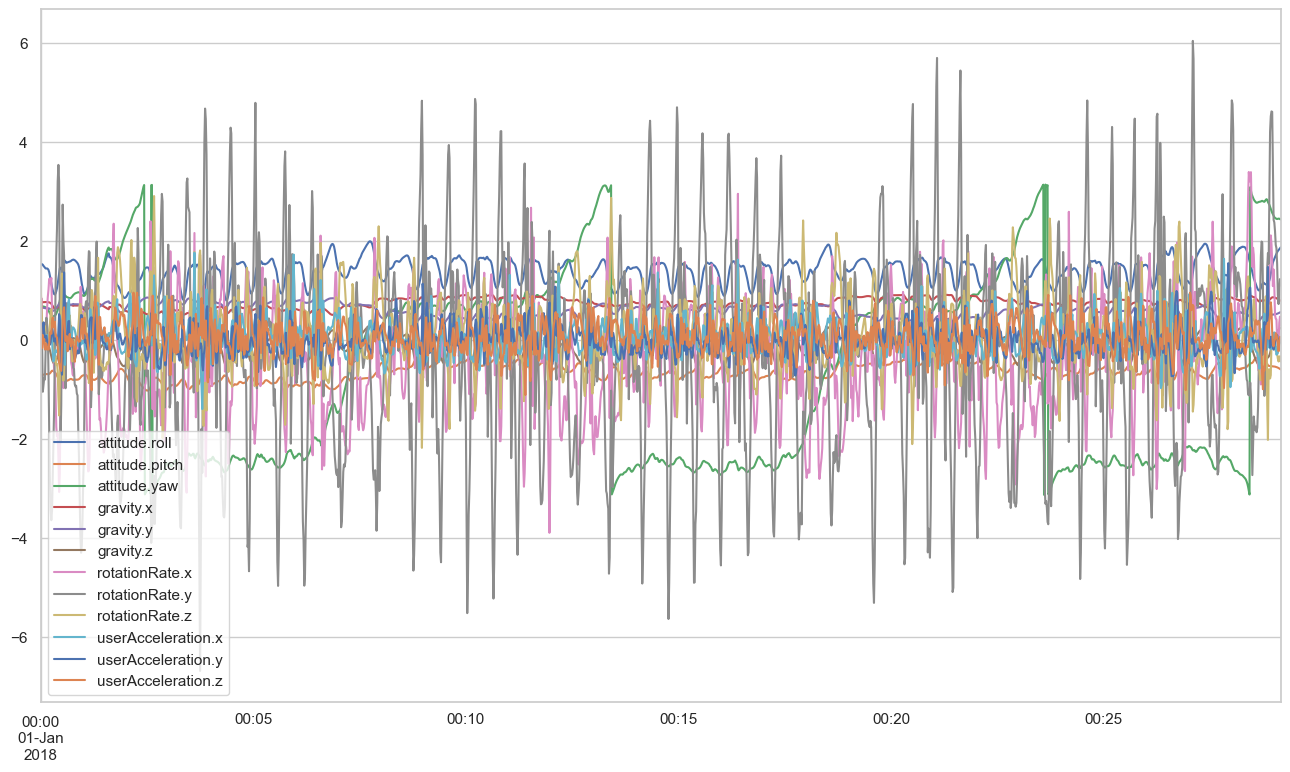

In [53]:
df.plot()

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

In [61]:
# Your code here:
df.columns

Index(['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x',
       'gravity.y', 'gravity.z', 'rotationRate.x', 'rotationRate.y',
       'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y',
       'userAcceleration.z'],
      dtype='object')

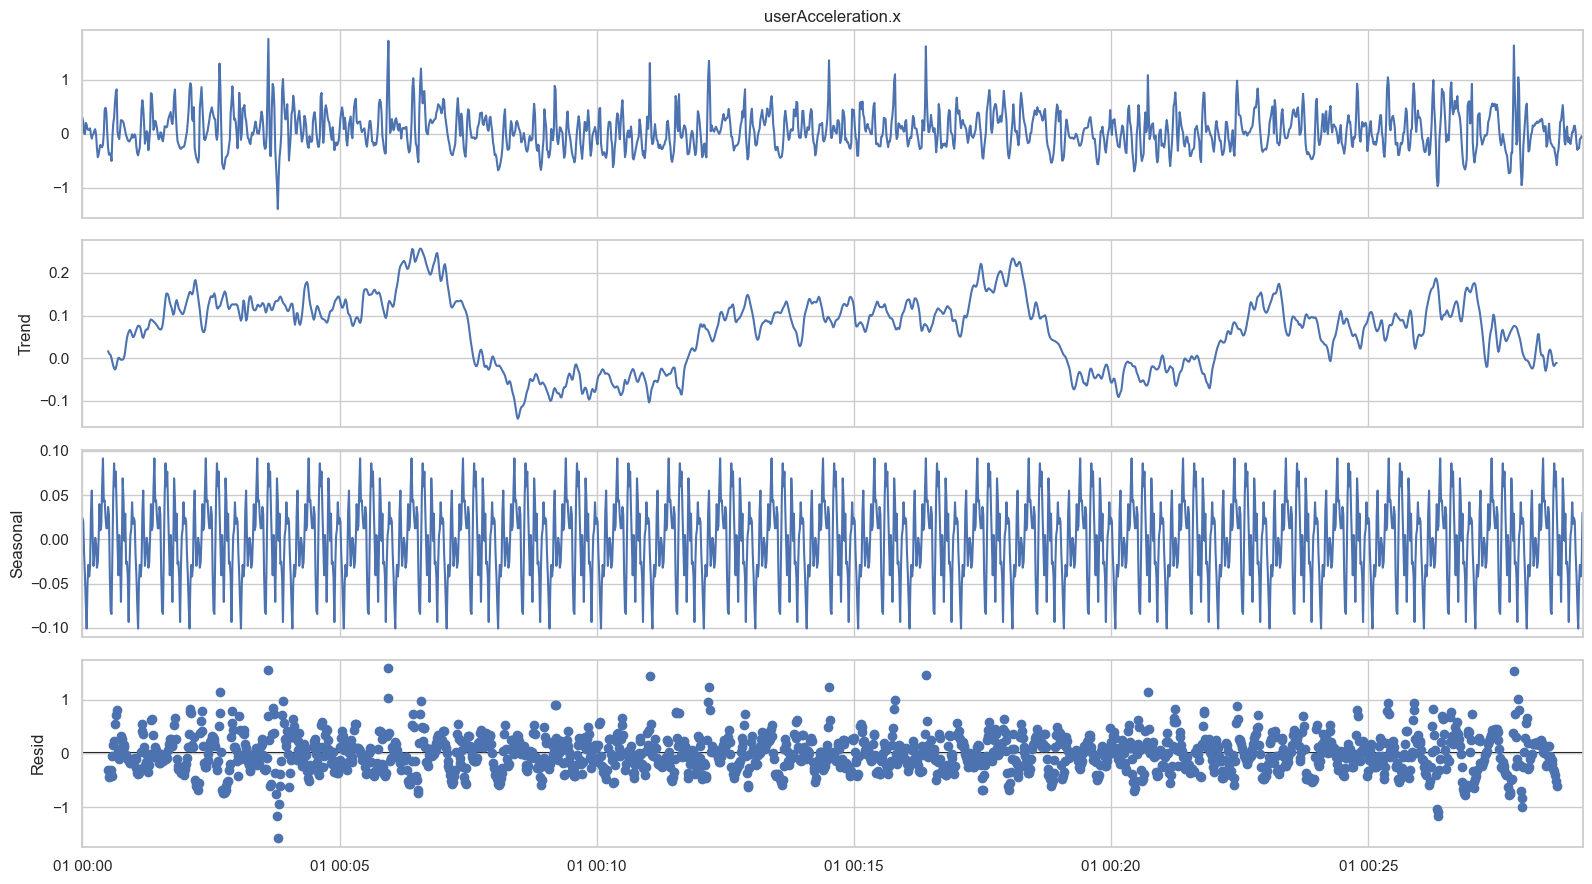

In [72]:
decomp = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], period=60)
# Plot 
decomp.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

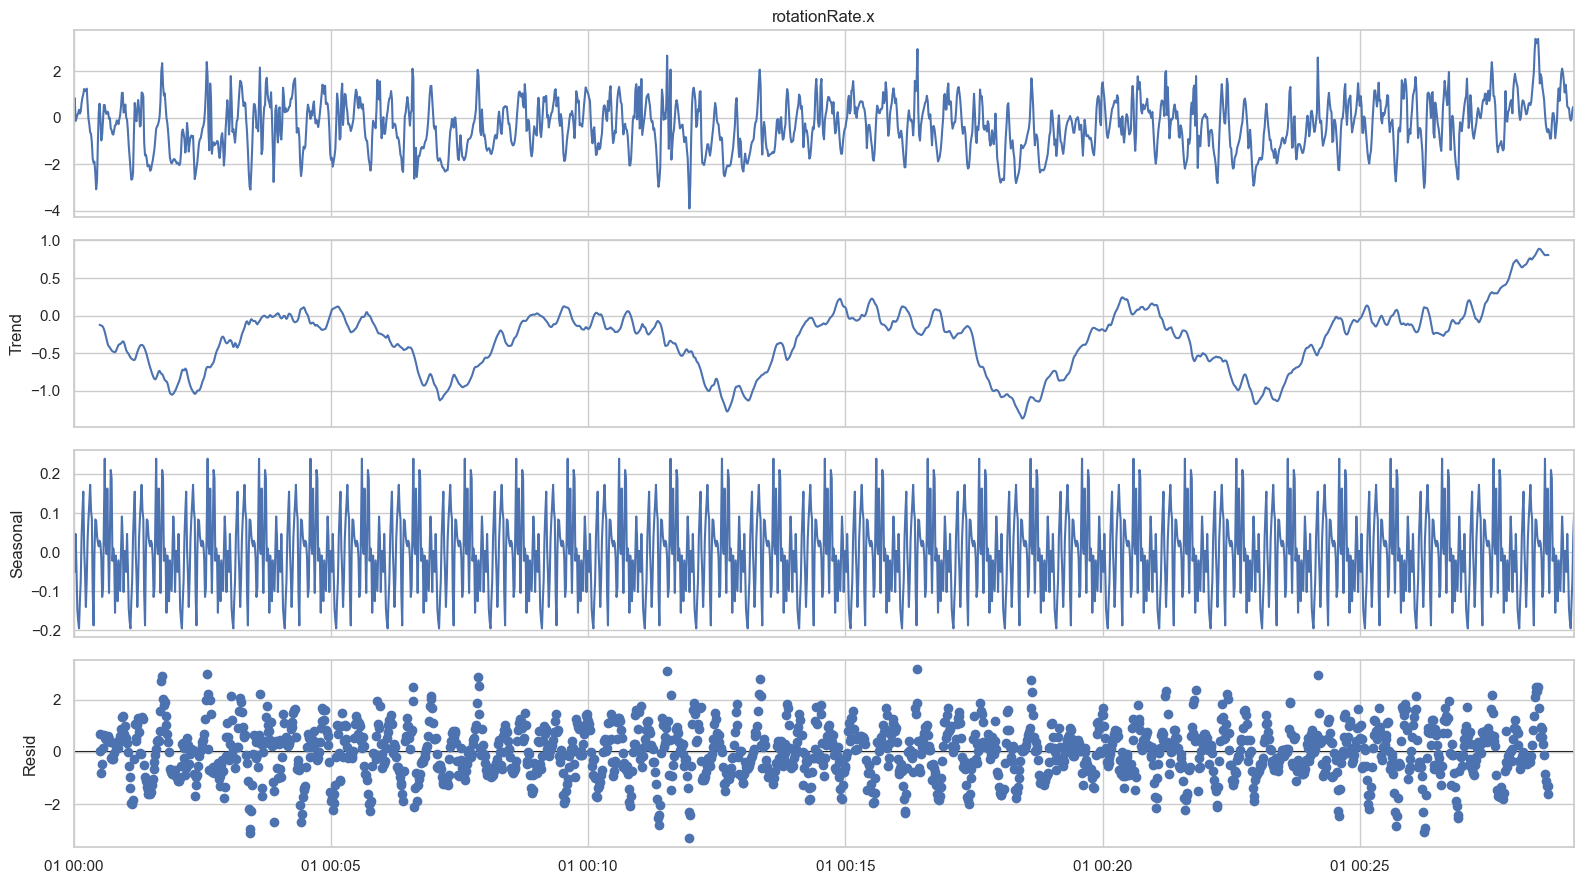

In [73]:
decomp1 = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], period=60)
# Plot the decomposed components
decomp1.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

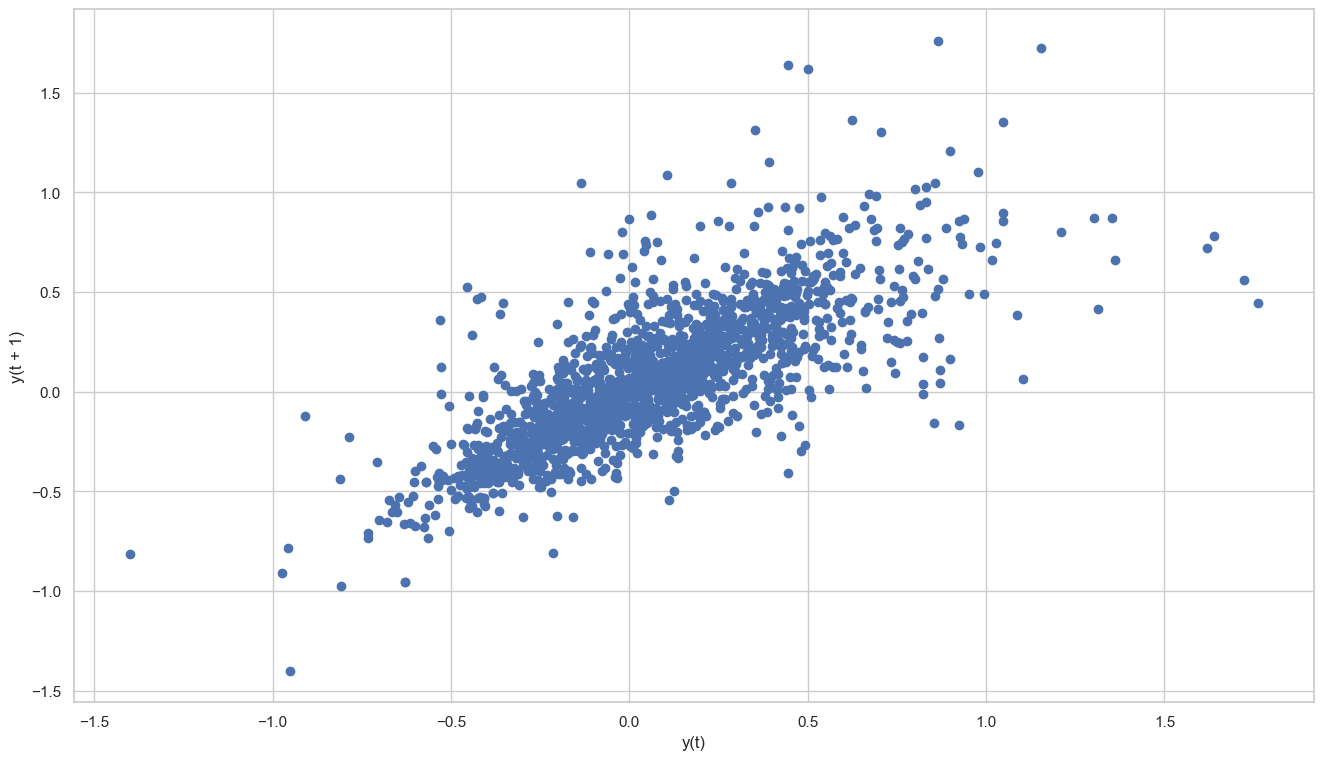

In [74]:
pd.plotting.lag_plot(df["userAcceleration.x"], lag=1);

Create a lag plot for `rotationRate.x`

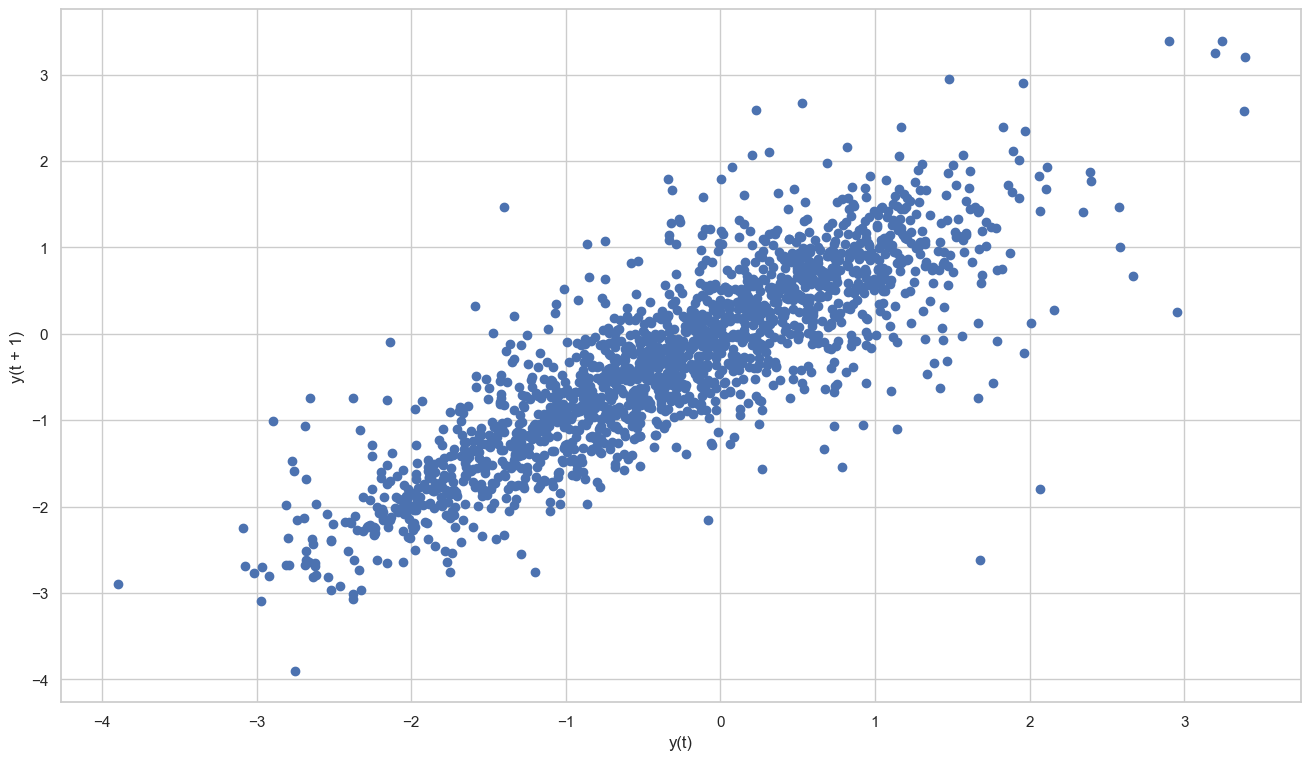

In [75]:
pd.plotting.lag_plot(df["rotationRate.x"], lag=1);

What are your conclusions from both visualizations?

In [11]:
# From this plot, we can conclude that both, userAcceleration.x and rotationRate.x
# have a positive correlation. However, the standart deviation in rotationRate.x is 
# bigger since the data points are more widespread. 
# We can conclude that there is a moderate autocorrelation. 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [78]:
# We do not know if it is stationary. Anyways we perform an ARIMA model 
# which its aim is to obtain stationary series.
# Is a combination of AR(AutoRegressive model), I (Integrated) and 
# MA(Moving Average) that performs good in non-stationary series

model = ARIMA(df["userAcceleration.x"], order = (6, 0, 2)).fit()


c:\Users\Sara\miniconda3\envs\ironhack\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
c:\Users\Sara\miniconda3\envs\ironhack\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
c:\Users\Sara\miniconda3\envs\ironhack\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


In [79]:
model.mae #The error mean avarage is really low 

0.13599295053751476

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:                 ARIMA(6, 0, 2)   Log Likelihood                 384.970
Date:                Tue, 14 Nov 2023   AIC                           -749.939
Time:                        15:14:46   BIC                           -695.260
Sample:                    01-01-2018   HQIC                          -729.727
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0625      0.015      4.303      0.000       0.034       0.091
ar.L1          0.5707      0.711      0.803      0.422      -0.822       1.964
ar.L2         -0.0538      1.007     -0.053      0.957      -2.027       1.920
ar.L3         -0.0784      0.678     -0.116      0.908      -1.406       1.250
ar.L4         -0.0061      0.231     -0.027      0.979      -0.459       0.446
ar.L5         -0.0107      0.039     -0.275      0.783      -0.087       0.066
ar.L6         -0.0588      0.047     -1.250      0.211      -0.151       0.033
ma.L1          0.5983      0.713      0.840      0.401      -0.799       1.995
ma.L2          0.1602      0.342      0.468      0.640      -0.511       0.831
sigma2         0.0377      0.001     44.109      0.000       0.036       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1784.14
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.31
Prob(H) (two-sided):                  0.51   Kurtosis:                         7.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

What are your conclusions from this test?

In [13]:
# The model results shows us that we have used 6 lags for AR model, an 2 lags for
# MA model. Also, it shows us the std error, for lag and constants, which are low.  
# And last, z test statistics and p > [z], to know if the model has run correctly. 
# If the p value is lower than 0.05 then we reject the null hypothesis. In this case, 
# we fail to reject the null hypothesis, as the p-value is biger than 0.05 at a 95% 
# coeficient interval. 

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [81]:
order = (2, 0, 1)

In [82]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [85]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html
model = ARIMA(y_train, order = order, freq="S")

c:\Users\Sara\miniconda3\envs\ironhack\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


In [90]:
# 2. Fit the model:
model1 = model.fit()

In [93]:
# 3. Predict: create y_pred:
y_pred = model1.predict()

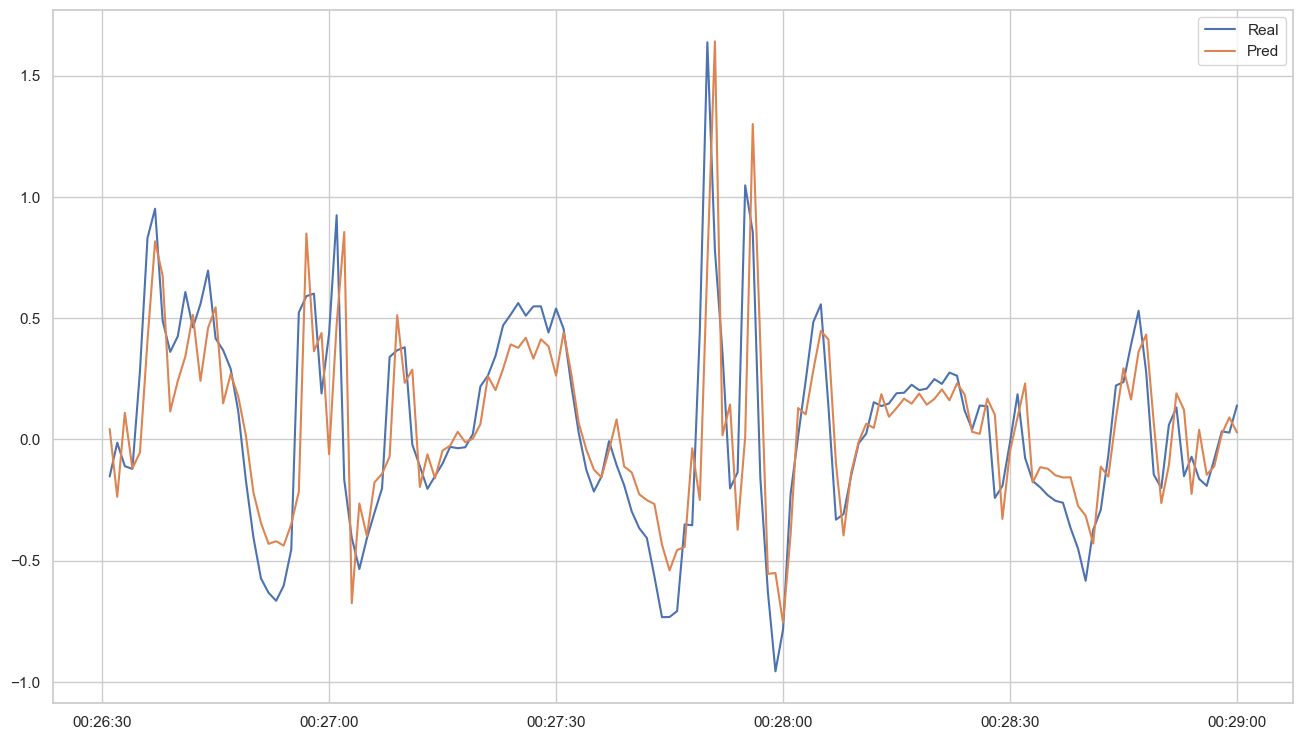

In [94]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [98]:
# Your code here:
import statsmodels.tools.eval_measures as em
em.rmse(y_pred[-11:], y_test, axis=0)
# rmse(y_pred, y_test)

0.21157472983837355